
Daily Report for 2025-02-06
+---------------------+---------+
| Metric              |   Value |
+=====================+=========+
| Total Orders        |       1 |
+---------------------+---------+
| Total Sales         |      29 |
+---------------------+---------+
| Total Customers     |       1 |
+---------------------+---------+
| Average Order Value |      29 |
+---------------------+---------+


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10708\1157032079.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(self.summary.keys()), y=list(self.summary.values()), palette="viridis")


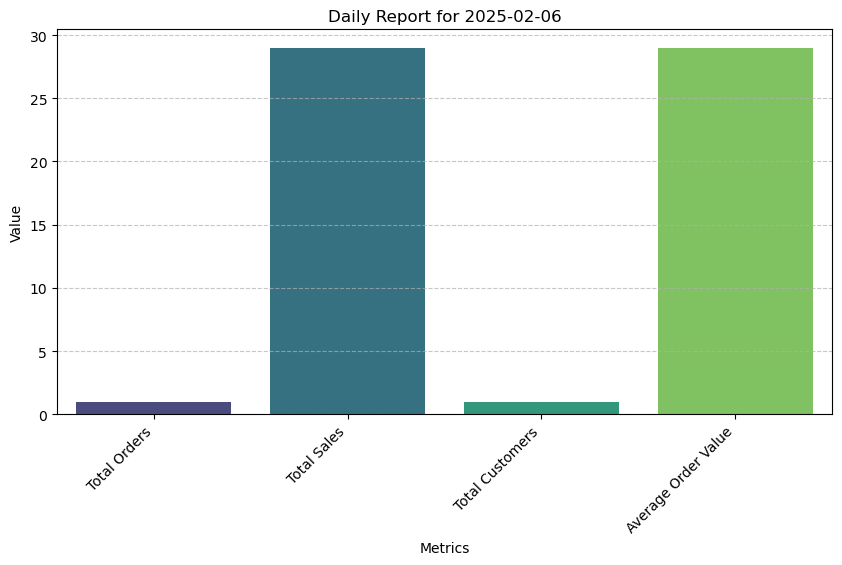


Weekly Report for 2025-01-29 to 2025-02-04
+-----------------+---------+
| Metric          |   Value |
+=================+=========+
| Total Orders    |       7 |
+-----------------+---------+
| Total Sales     |    1500 |
+-----------------+---------+
| Total Customers |       7 |
+-----------------+---------+
| New Customers   |      17 |
+-----------------+---------+
| Total Returns   |      33 |
+-----------------+---------+


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10708\1157032079.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(self.summary.keys()), y=list(self.summary.values()), palette="viridis")


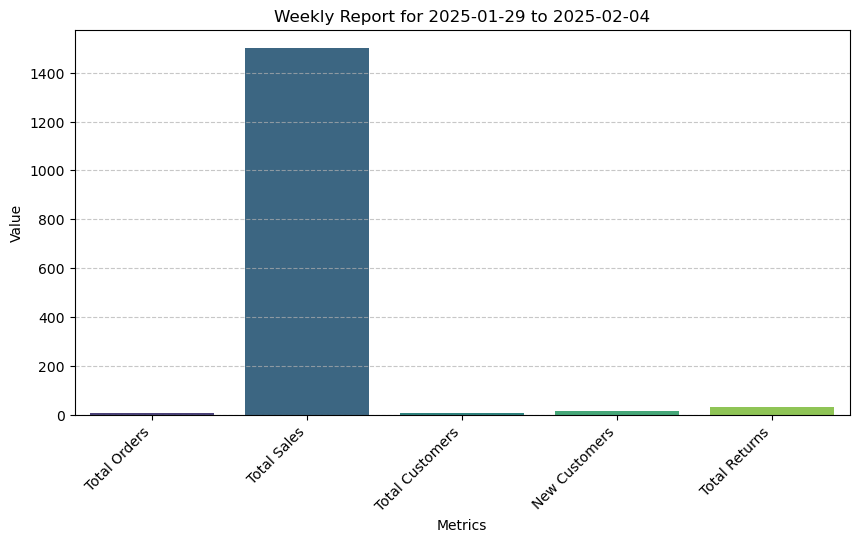


Monthly Report for 1-2025
+---------------------+------------+
| Metric              |      Value |
+=====================+============+
| Total Orders        |     31     |
+---------------------+------------+
| Total Sales         |   7052     |
+---------------------+------------+
| Total Customers     |     31     |
+---------------------+------------+
| New Customers       |     57     |
+---------------------+------------+
| Total Returns       |    162     |
+---------------------+------------+
| Average Order Value |    227.484 |
+---------------------+------------+
| Total Revenue       | 826396     |
+---------------------+------------+


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10708\1157032079.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(self.summary.keys()), y=list(self.summary.values()), palette="viridis")


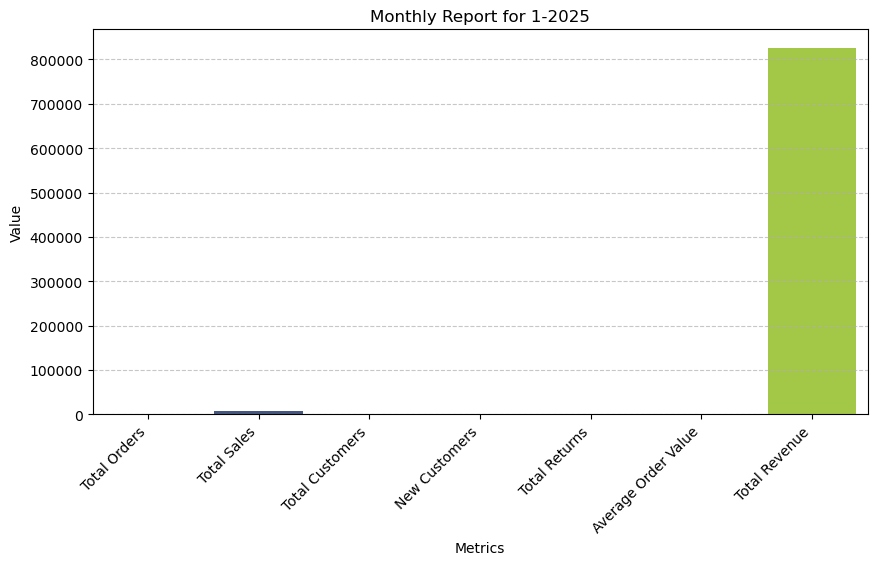


Quarterly Report for Q1 2025
+-----------------+---------+
| Metric          |   Value |
+=================+=========+
| Total Orders    |      90 |
+-----------------+---------+
| Total Sales     |   20515 |
+-----------------+---------+
| Total Customers |      89 |
+-----------------+---------+
| New Customers   |     192 |
+-----------------+---------+
| Total Returns   |     403 |
+-----------------+---------+
| Net Profit      |  645660 |
+-----------------+---------+


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10708\1157032079.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(self.summary.keys()), y=list(self.summary.values()), palette="viridis")


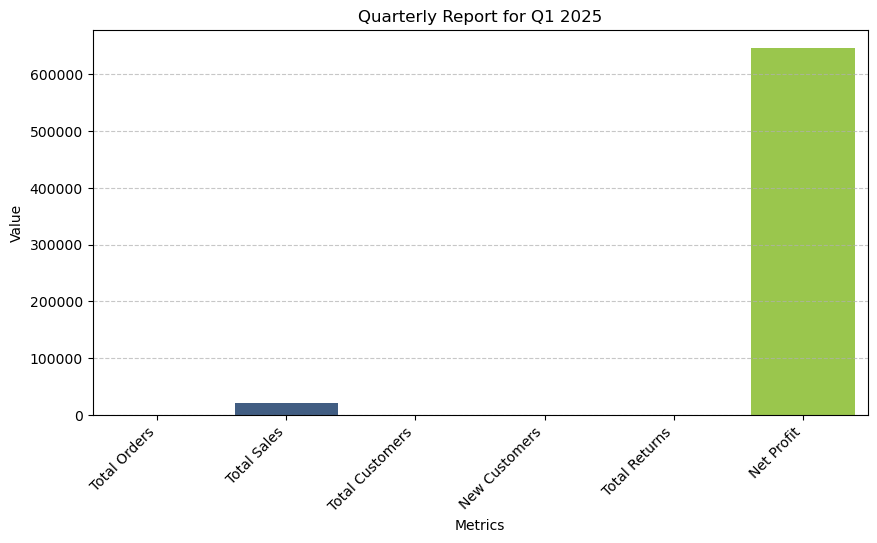

In [1]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base Report class for E-commerce business
class Report:
    def __init__(self, report_type, date_range, data):
        self.report_type = report_type  # Report type (Daily, Weekly, Monthly, Quarterly)
        self.date_range = date_range  # Time period covered by the report
        self.data = data  # Dataset containing e-commerce transactions
        self.summary = None  # Summary metrics for the report

    def generate_report(self):
        """Method to be implemented by subclasses to generate specific reports."""
        raise NotImplementedError("Subclasses must implement generate_report method")

    def display_report(self):
        """Displays the report summary in a tabulated format."""
        print(f"\n{'='*80}\n{self.report_type} Report for {self.date_range}\n{'='*80}")
        print(tabulate(self.summary.items(), headers=["Metric", "Value"], tablefmt="grid"))
        self.visualize_report()
    
    def visualize_report(self):
        """Visualizes the report summary using a bar chart."""
        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(self.summary.keys()), y=list(self.summary.values()), palette="viridis")
        plt.xticks(rotation=45, ha='right')
        plt.title(f"{self.report_type} Report for {self.date_range}")
        plt.ylabel("Value")
        plt.xlabel("Metrics")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

# Daily Report Class
class DailyReport(Report):
    def __init__(self, date, data):
        super().__init__('Daily', date, data)

    def generate_report(self):
        """Generates a daily report with key e-commerce metrics."""
        daily_data = self.data[self.data['date'] == self.date_range]
        self.summary = {
            "Total Orders": daily_data.shape[0],
            "Total Sales": daily_data['sales_amount'].sum(),
            "Total Customers": daily_data['customer_id'].nunique(),
            "Average Order Value": daily_data['sales_amount'].mean()
        }

# Weekly Report Class
class WeeklyReport(Report):
    def __init__(self, start_date, end_date, data):
        super().__init__('Weekly', f"{start_date} to {end_date}", data)

    def generate_report(self):
        """Generates a weekly report with key e-commerce metrics."""
        weekly_data = self.data[(self.data['date'] >= self.date_range.split()[0]) & 
                                (self.data['date'] <= self.date_range.split()[-1])]
        self.summary = {
            "Total Orders": weekly_data.shape[0],
            "Total Sales": weekly_data['sales_amount'].sum(),
            "Total Customers": weekly_data['customer_id'].nunique(),
            "New Customers": weekly_data['new_customers'].sum(),
            "Total Returns": weekly_data['returns'].sum()
        }

# Monthly Report Class
class MonthlyReport(Report):
    def __init__(self, month, year, data):
        super().__init__('Monthly', f"{month}-{year}", data)
        self.month = int(month)
        self.year = int(year)

    def generate_report(self):
        """Generates a monthly report with key e-commerce metrics."""
        monthly_data = self.data[(pd.to_datetime(self.data['date']).dt.month == self.month) &
                                 (pd.to_datetime(self.data['date']).dt.year == self.year)]
        self.summary = {
            "Total Orders": monthly_data.shape[0],
            "Total Sales": monthly_data['sales_amount'].sum(),
            "Total Customers": monthly_data['customer_id'].nunique(),
            "New Customers": monthly_data['new_customers'].sum(),
            "Total Returns": monthly_data['returns'].sum(),
            "Average Order Value": monthly_data['sales_amount'].mean(),
            "Total Revenue": monthly_data['revenue'].sum()
        }

# Quarterly Report Class
class QuarterlyReport(Report):
    def __init__(self, quarter, year, data):
        super().__init__('Quarterly', f"Q{quarter} {year}", data)
        self.quarter = int(quarter)
        self.year = int(year)

    def generate_report(self):
        """Generates a quarterly report with key e-commerce metrics."""
        quarterly_data = self.data[(pd.to_datetime(self.data['date']).dt.quarter == self.quarter) &
                                   (pd.to_datetime(self.data['date']).dt.year == self.year)]
        self.summary = {
            "Total Orders": quarterly_data.shape[0],
            "Total Sales": quarterly_data['sales_amount'].sum(),
            "Total Customers": quarterly_data['customer_id'].nunique(),
            "New Customers": quarterly_data['new_customers'].sum(),
            "Total Returns": quarterly_data['returns'].sum(),
            "Net Profit": quarterly_data['revenue'].sum() - quarterly_data['expenses'].sum()
        }

# Generate a large dataset with 20 variables for testing
data = pd.DataFrame({
    'date': pd.date_range(start='2025-01-01', periods=500, freq='D').astype(str),
    'customer_id': np.random.randint(1000, 5000, size=500),
    'sales_amount': np.random.randint(20, 500, size=500),
    'new_customers': np.random.randint(0, 5, size=500),
    'returns': np.random.randint(0, 10, size=500),
    'revenue': np.random.randint(1000, 50000, size=500),
    'expenses': np.random.randint(500, 30000, size=500)
})

# Generate and display different reports
daily = DailyReport("2025-02-06", data)
daily.generate_report()
daily.display_report()

weekly = WeeklyReport("2025-01-29", "2025-02-04", data)
weekly.generate_report()
weekly.display_report()

monthly = MonthlyReport(1, 2025, data)
monthly.generate_report()
monthly.display_report()

quarterly = QuarterlyReport(1, 2025, data)
quarterly.generate_report()
quarterly.display_report()
